In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

strokedata = pd.read_csv("stroke_data.csv")
strokedata.count()

#drop ID variable
strokedata = strokedata.drop('id', axis=1)

#replacing null BMI values with median value
strokedata['bmi'].fillna(strokedata['bmi'].median(), inplace=True)

#drop instance with Other gender
strokedata = strokedata.drop(strokedata[strokedata['gender'] == 'Other'].index)

# create one-hot encoding
strokedata = pd.get_dummies(strokedata, columns=['gender','ever_married', 'smoking_status', 'work_type', 'Residence_type'])
strokedata = strokedata.drop(columns = ['gender_Male', 'ever_married_No', 'smoking_status_never smoked', 'work_type_Never_worked', 'Residence_type_Rural'], axis=1)


strokedata.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,ever_married_Yes,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,0,0,1
1,61.0,0,0,202.21,28.1,1,1,1,0,0,0,0,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,0,0,1,0,0,0
3,49.0,0,0,171.23,34.4,1,1,1,0,0,1,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,1,1,0,0,0,0,0,1,0,0


In [68]:
#Create Training and Testing Sets

from sklearn.model_selection import train_test_split
from collections import Counter


#Splitting into training and testing sets
train_set, test_set = train_test_split(strokedata, test_size=.15, stratify=strokedata["stroke"], random_state=42)

#Creating input and label data
target = 'stroke'

X_train = train_set.drop(target, axis=1)

X_test = test_set.drop(target, axis=1)
y_train = train_set[target]
y_test = test_set[target]

count = Counter(y_train)
print(count)

strokedata.describe()



Counter({0: 4130, 1: 212})


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,ever_married_Yes,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.863300,0.048738,0.586025,0.656293,0.302212,0.173028,0.154433,0.128597,0.572323,0.160305,0.134469,0.508123
std,22.613575,0.296633,0.226084,45.285004,7.699785,0.215340,0.492592,0.474991,0.459261,0.378308,0.361399,0.334786,0.494790,0.366925,0.341188,0.499983
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.100000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
#Augmenting training data

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

count = Counter(y_train_smote)
print(count)

Counter({0: 4130, 1: 4130})


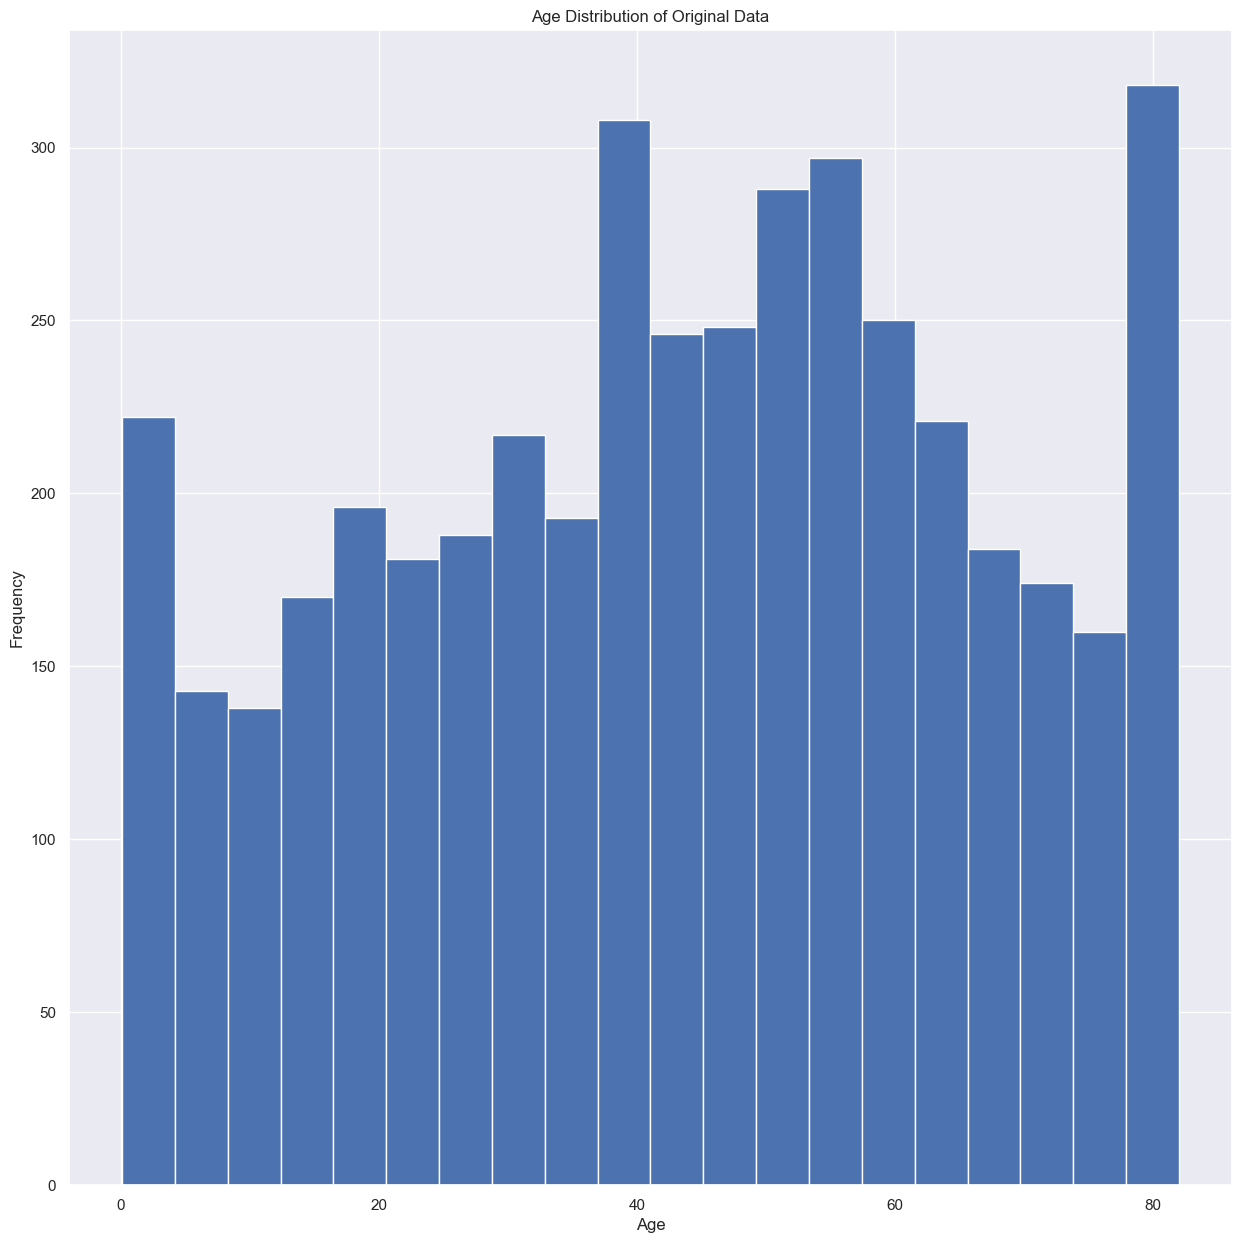

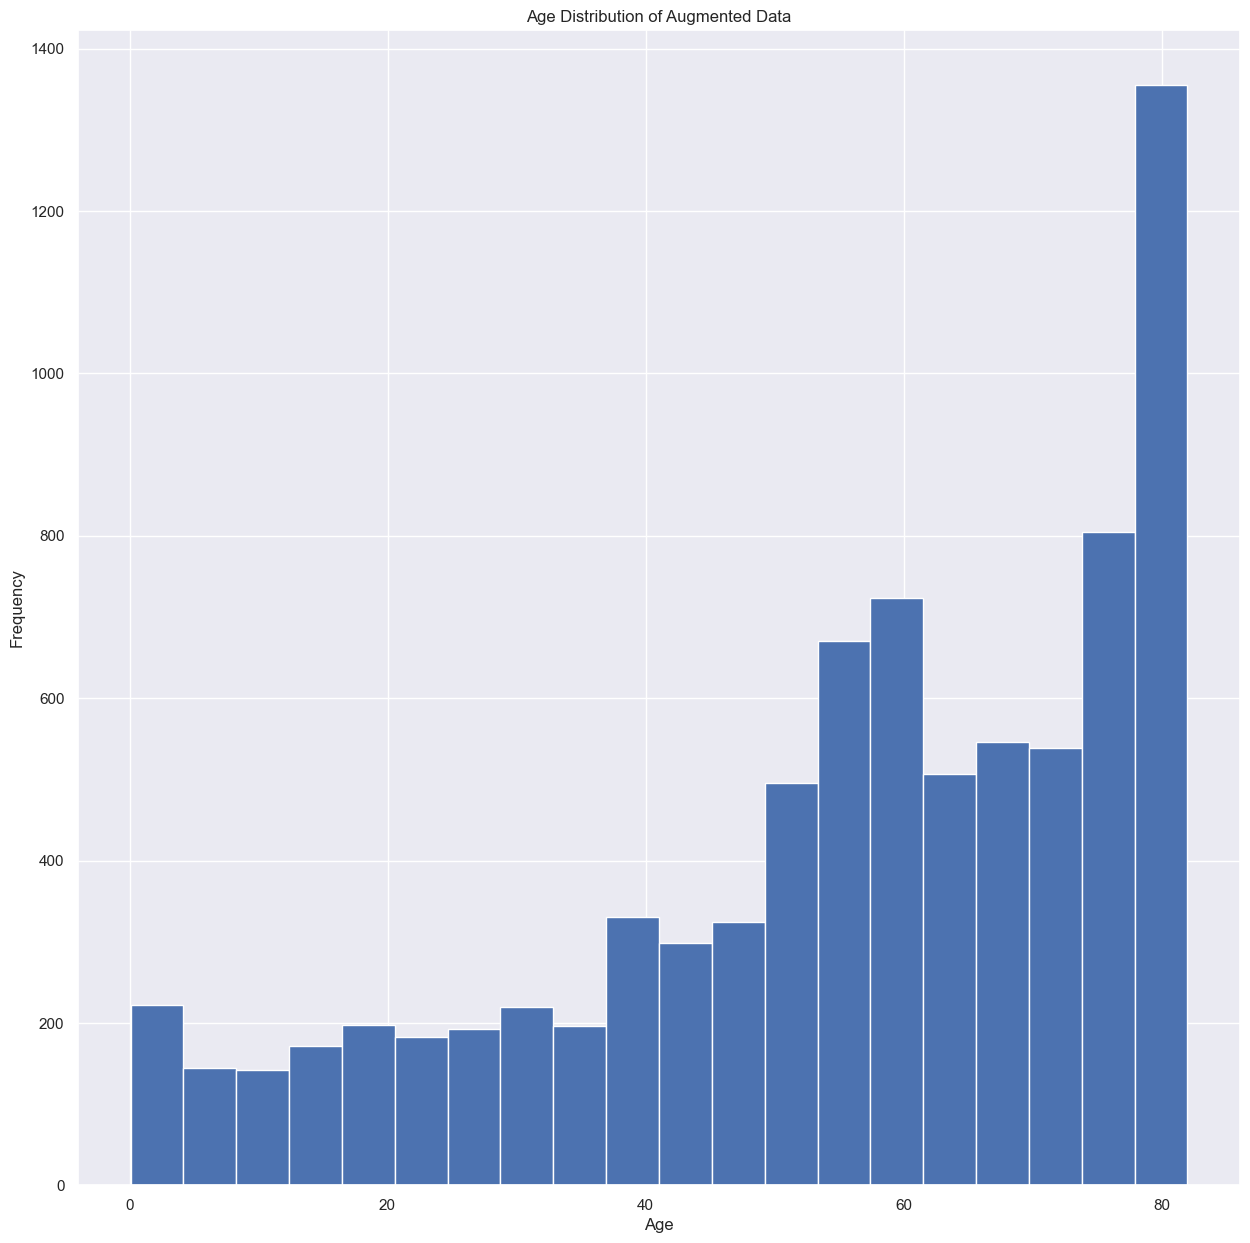

In [70]:
import matplotlib.pyplot as plt

#Age Dist before augmentation
plt.hist(X_train['age'], bins = 20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Original Data")
plt.savefig("AgedistOriginal.png", bbox_inches = 'tight')
plt.show()

#Age Dist after Augmentation
plt.hist(X_train_smote['age'], bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Augmented Data")
plt.savefig("AgedistAugmented.png", bbox_inches = 'tight')
plt.show()



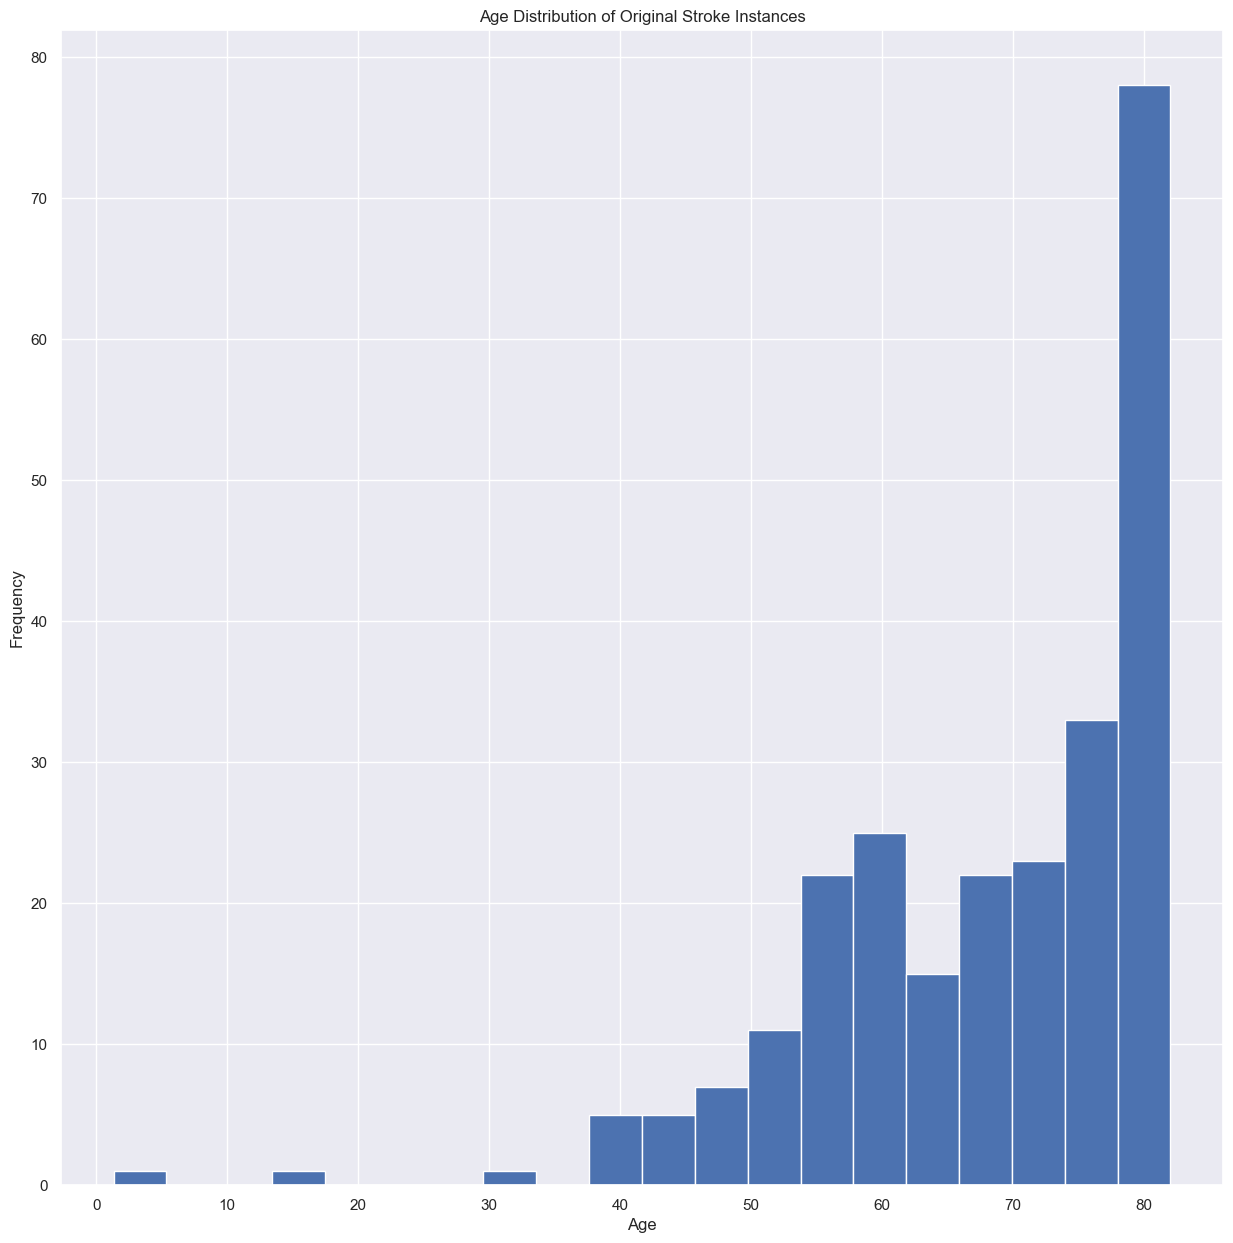

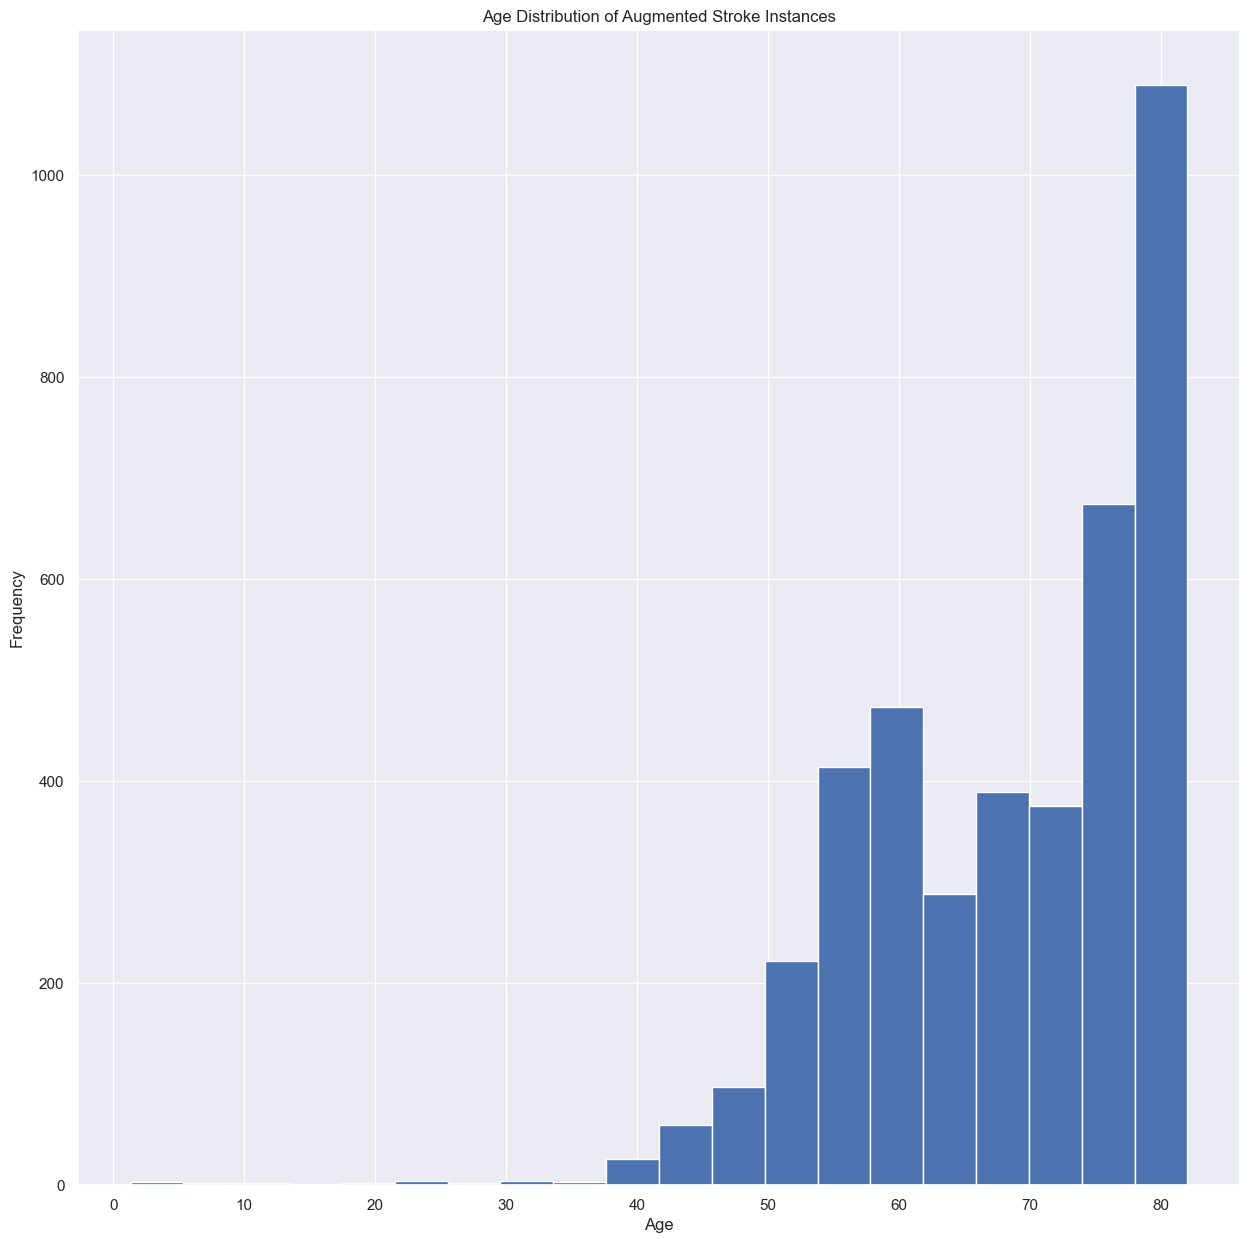

In [71]:
#Age Dist of Stroke before and after Augmentation

onlystrokebefore = strokedata[strokedata['stroke'] == 1]
plt.hist(onlystrokebefore['age'], bins=20)
plt.title("Age Distribution of Original Stroke Instances")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig("StrokeageOriginal.png", bbox_inches = 'tight')
plt.show()

onlystrokeafter = X_train_smote[y_train_smote == 1]
plt.hist(onlystrokeafter['age'], bins=20)
plt.title("Age Distribution of Augmented Stroke Instances")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig("StrokeageAugmented.png", bbox_inches = 'tight')
plt.show()




In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = X_train_smote.copy()
X_test_std = X_test.copy()

float_columns1 = [x for x in X_train_smote.columns if x in ['bmi','age','avg_glucose_level']]
float_columns2 = [x for x in X_test.columns if x in ['bmi','age','avg_glucose_level']]


X_train_std[float_columns1] = scaler.fit_transform(X_train_std[float_columns1])
X_train_std = pd.DataFrame(X_train_std, columns = X_train_smote.columns)
X_test_std[float_columns2] = scaler.fit_transform(X_test[float_columns2])

X_train_std.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,ever_married_Yes,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
0,-0.963388,0,0,1.921129,1.363690,1,0,1,0,0,1,0,0,0,1
1,-1.556413,0,0,-0.465637,1.150644,0,0,0,0,0,0,0,1,0,1
2,-0.370363,0,0,1.362231,2.444134,1,1,0,0,0,0,1,0,0,0
3,-1.602030,0,0,-0.802872,-1.086332,1,1,0,0,0,0,1,0,0,1
4,-1.009005,0,0,1.808240,1.546300,0,1,0,0,0,0,1,0,0,0


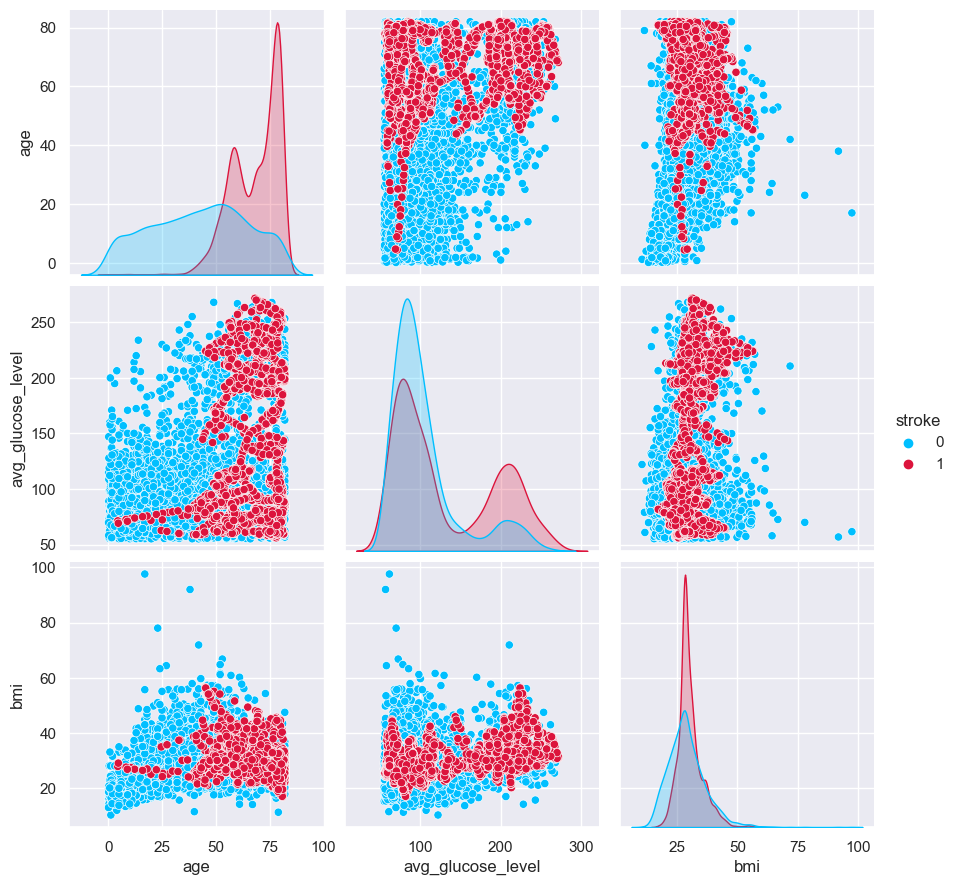

In [73]:

training = X_train_smote.assign(stroke= y_train_smote.values)
training.head()

float_columns3 = [x for x in training.columns if x in ['bmi','age','avg_glucose_level']]

sns.set_context('notebook')
fig = sns.pairplot(training[float_columns3 + ['stroke']], 
             hue='stroke', 
             hue_order=[0,1],
             height=3,
             palette={0:'deepskyblue',1:'crimson'});

fig.savefig("multiplegraphs.png", bbox_inches='tight')

In [74]:
#logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def aprf(classifier, predict, test):
    # Calculate accuracy
    accuracy = accuracy_score(test, predict)
    print("Accuracy:", accuracy)

    # Calculate precision
    precision = precision_score(test, predict)
    print("Precision:", precision)

    # Calculate recall (sensitivity)
    recall = recall_score(test, predict)
    print("Recall (Sensitivity):", recall)

    # Calculate F1-score
    f1 = f1_score(test, predict)
    print("F1-Score:", f1)
    print("\n")

In [75]:
#default logistic regression (.5 threshold)
logreg = LogisticRegression(random_state = 42)
result = logreg.fit(X_train_std, y_train_smote)
predictions = result.predict(X_test_std)


aprf(logreg, predictions, y_test)




Accuracy: 0.7496740547588006
Precision: 0.13270142180094788
Recall (Sensitivity): 0.7567567567567568
F1-Score: 0.22580645161290322




In [76]:
#GRIDSEARCH logistic regression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils.fixes import loguniform
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)


# define search
search = RandomizedSearchCV(logreg, space, n_iter=500, scoring='f1', n_jobs=-1, cv=cv, random_state=1)

...
# execute search
result = search.fit(X_train_std, y_train_smote)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


/Users/gracejohnson/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/gracejohnson/anaconda3/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Best Score: 0.8803609252235148
Best Hyperparameters: {'C': 0.29847870313044966, 'penalty': 'l2', 'solver': 'newton-cg'}


/Users/gracejohnson/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
8310 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1680 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gracejohnson/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gracejohnson/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/gracejohnson/anaconda3/lib/python3.10/site-packages/sklearn/linear_mod

In [77]:
#Testing accuracy/recall of Gridsearch model

threshold5 = result.predict(X_test_std)
aprf(logreg, threshold5, y_test)

threshold3 = (result.predict_proba(X_test_std)[:, 1] >= 0.3).astype(int)
aprf(logreg, threshold3, y_test)

threshold1 = (result.predict_proba(X_test_std)[:, 1] >= 0.1).astype(int)
aprf(logreg, threshold1, y_test)

threshold05 = (result.predict_proba(X_test_std)[:, 1] >= 0.05).astype(int)
aprf(logreg, threshold05, y_test)

threshold65 = (result.predict_proba(X_test_std)[:, 1] >= 0.65).astype(int)
aprf(logreg, threshold65, y_test)




Accuracy: 0.7470664928292047
Precision: 0.13145539906103287
Recall (Sensitivity): 0.7567567567567568
F1-Score: 0.224


Accuracy: 0.636245110821382
Precision: 0.09666666666666666
Recall (Sensitivity): 0.7837837837837838
F1-Score: 0.17210682492581603


Accuracy: 0.36897001303780963
Precision: 0.06432748538011696
Recall (Sensitivity): 0.8918918918918919
F1-Score: 0.12


Accuracy: 0.2620599739243807
Precision: 0.05843071786310518
Recall (Sensitivity): 0.9459459459459459
F1-Score: 0.110062893081761


Accuracy: 0.8265971316818774
Precision: 0.17123287671232876
Recall (Sensitivity): 0.6756756756756757
F1-Score: 0.27322404371584696




In [78]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


cv = KFold(n_splits=10, random_state=1, shuffle=True)
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(logreg, X_train_std, y_train_smote, scoring=scoring, cv=cv, n_jobs=-1)
print('precision scores: ', scores['test_precision_macro'])
print('recall scores: ', scores['test_recall_macro'])
print('Average Precision: ', np.mean(scores['test_precision_macro']))
print('Average Recall: ', np.mean(scores['test_recall_macro']))

scoring2 = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

results = cross_validate(estimator=logreg,X= X_train_std,y=y_train_smote, cv=cv,scoring=scoring2)

print(results)

precision scores:  [0.87305329 0.86941472 0.89969351 0.88748063 0.90779593 0.88790651
 0.89693187 0.86357916 0.86305929 0.86732704]
recall scores:  [0.87313862 0.86917214 0.89928323 0.8871965  0.9080449  0.88827314
 0.89601032 0.8642475  0.86318719 0.86660334]
Average Precision:  0.8816241933291785
Average Recall:  0.8815156879421411
{'fit_time': array([0.02435613, 0.02161789, 0.02720475, 0.02308393, 0.02218008,
       0.02159119, 0.02122521, 0.02223778, 0.020684  , 0.02076793]), 'score_time': array([0.004246  , 0.00412297, 0.00473332, 0.00401115, 0.00481701,
       0.00416088, 0.0042789 , 0.0041101 , 0.00381017, 0.00423717]), 'test_accuracy': array([0.87288136, 0.86924939, 0.89951574, 0.8874092 , 0.90799031,
       0.8874092 , 0.89588378, 0.86440678, 0.86198547, 0.86682809]), 'test_precision': array([0.8872549 , 0.87562189, 0.90428212, 0.88944724, 0.91509434,
       0.91358025, 0.91857506, 0.84871795, 0.89473684, 0.87817259]), 'test_recall': array([0.85985748, 0.85853659, 0.88861386, 

In [79]:
#feature importance

import dataframe_image as dfi

numerical = strokedata[['age','avg_glucose_level', 'bmi']]

coefficients = logreg.coef_[0]
print(coefficients)
features = pd.DataFrame({'Feature': X_train_std.columns, 'Coefficient': coefficients, 'exp(Coefficient)': np.exp(coefficients)})
features = features.sort_values('exp(Coefficient)', ascending=True)
print(features)
dfi.export(features, 'featurecoeff.png')



[ 2.16608653 -0.63799399 -1.18550013  0.29634582  0.15729544 -1.17073842
 -0.60428454 -1.87515521 -1.63544499 -1.1978164  -5.69033973 -4.35539723
 -5.42021782 -3.62425924 -0.65826119]
                           Feature  Coefficient  exp(Coefficient)
10              work_type_Govt_job    -5.690340          0.003378
12         work_type_Self-employed    -5.420218          0.004426
11               work_type_Private    -4.355397          0.012837
13              work_type_children    -3.624259          0.026669
7           smoking_status_Unknown    -1.875155          0.153331
8   smoking_status_formerly smoked    -1.635445          0.194866
9            smoking_status_smokes    -1.197816          0.301853
2                    heart_disease    -1.185500          0.305593
5                    gender_Female    -1.170738          0.310138
14            Residence_type_Urban    -0.658261          0.517751
1                     hypertension    -0.637994          0.528351
6                 ever_m

work_type_children               -0.083888
smoking_status_Unknown           -0.055924
gender_Female                    -0.009081
work_type_Govt_job                0.002660
smoking_status_smokes             0.008920
work_type_Private                 0.011927
Residence_type_Urban              0.015415
bmi                               0.036075
work_type_Self-employed           0.062150
smoking_status_formerly smoked    0.064683
ever_married_Yes                  0.108299
hypertension                      0.127891
avg_glucose_level                 0.131991
heart_disease                     0.134905
age                               0.245239
stroke                            1.000000
dtype: float64


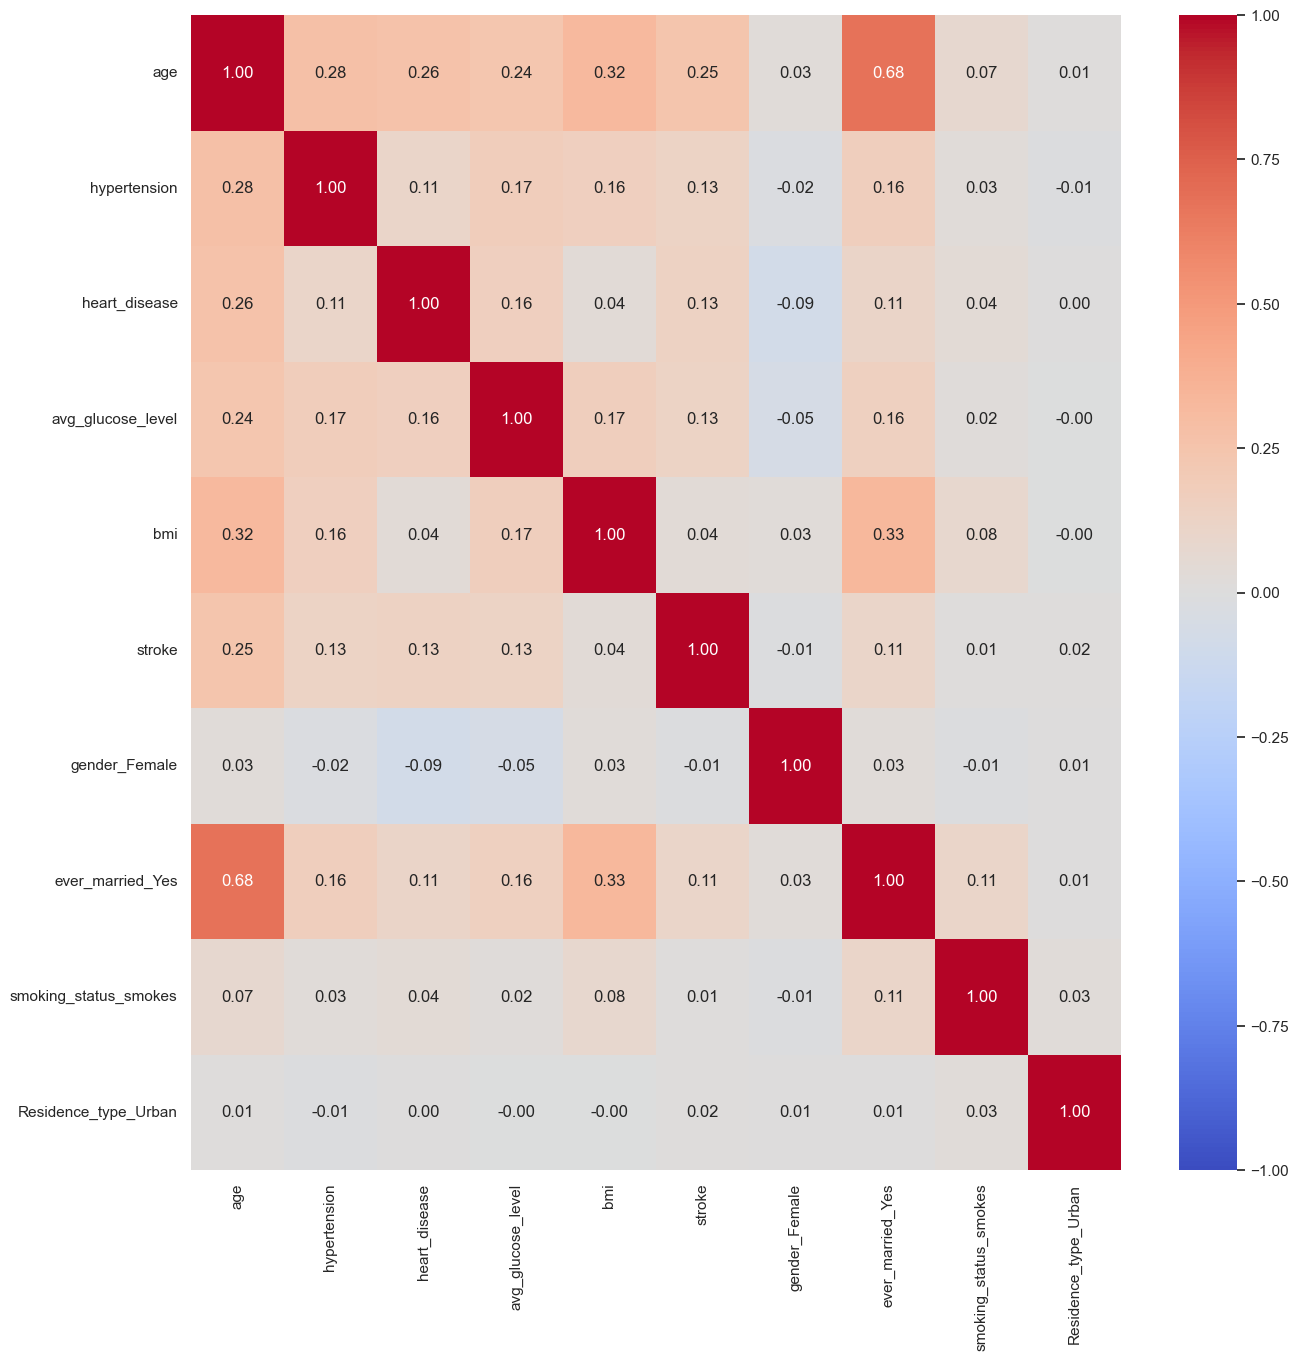

In [80]:
#Correlation heatmap matrix

import matplotlib.pyplot as plt

corr_mat = strokedata.corrwith(strokedata[target])
corr_mat = corr_mat.sort_values(ascending=True)
print(corr_mat)

corrmatdata = strokedata.drop(['smoking_status_Unknown','smoking_status_formerly smoked', 'work_type_children', 'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed'], axis=1)
sns.set(rc = {'figure.figsize':(15,15)})
heatcorr = sns.heatmap(corrmatdata.corr(),vmin=-1, vmax=1, annot = True, fmt='.2f',cmap= 'coolwarm')
fig = heatcorr.get_figure()
fig.savefig("heatmap.png", bbox_inches='tight') 


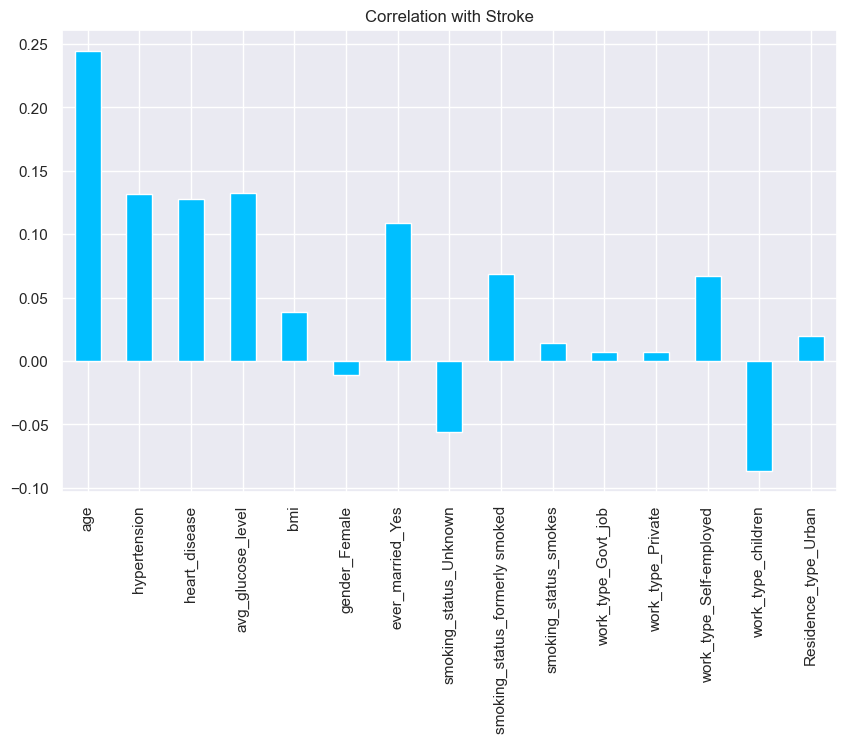

In [81]:
#Correlation Bar Chart

X_train.corrwith(strokedata.stroke).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Stroke",color="deepskyblue")
plt.savefig("corrbarchart.png", bbox_inches = 'tight')

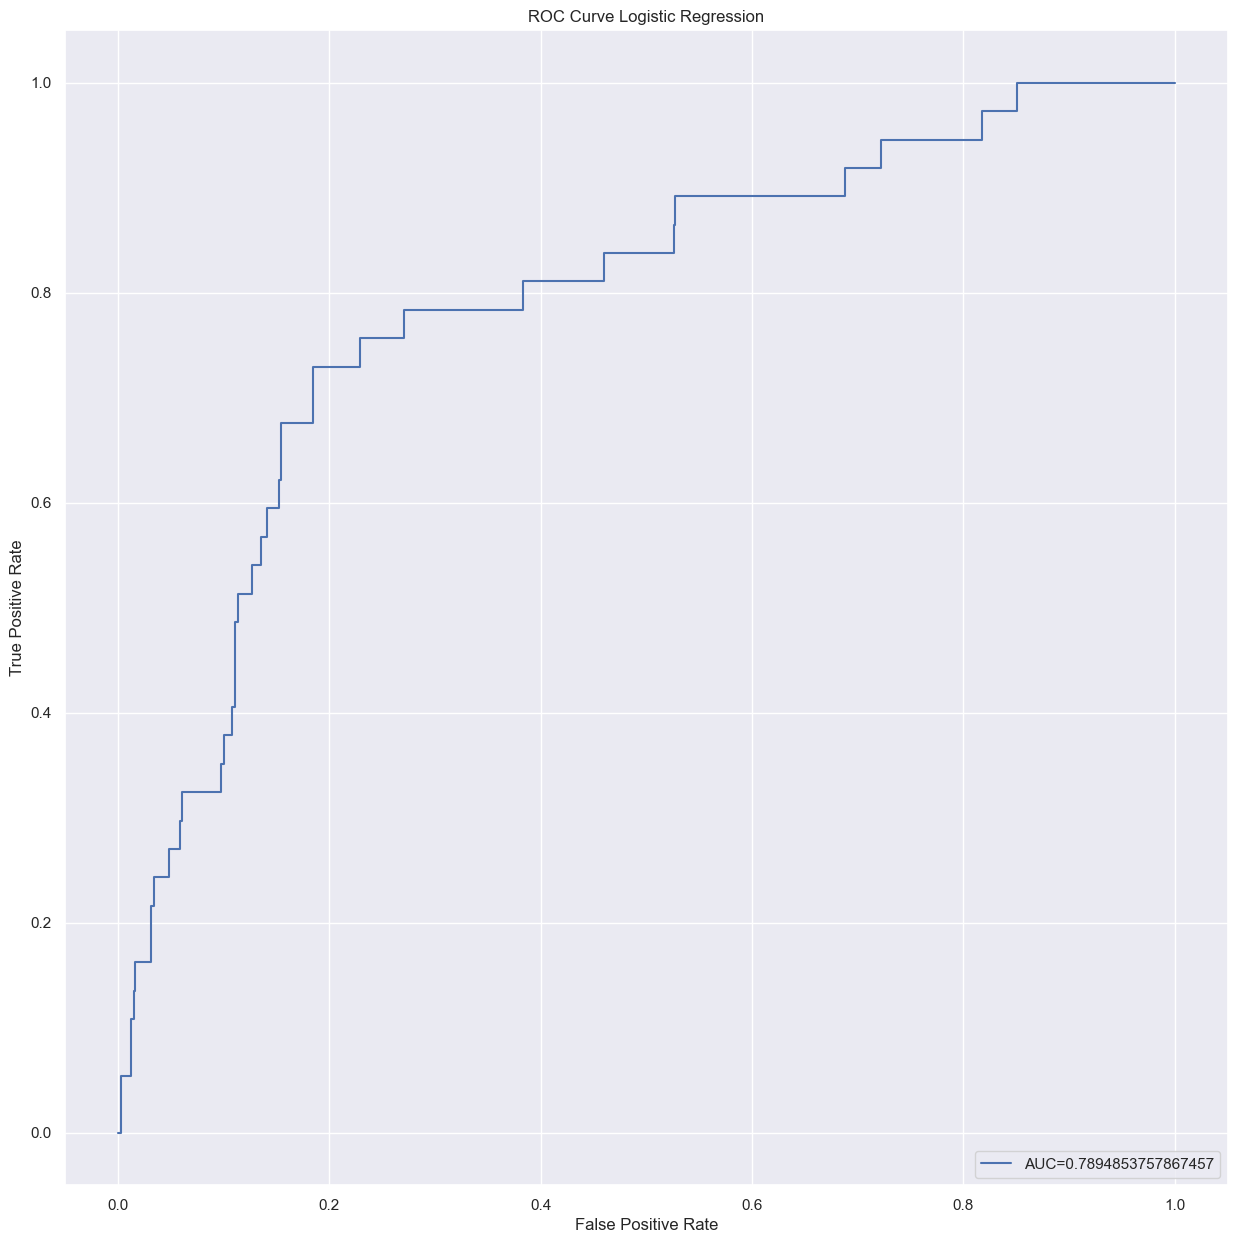

In [82]:
#ROC Curve

from sklearn import metrics

y_pred_proba = logreg.predict_proba(X_test_std)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC Curve Logistic Regression')
plt.savefig("ROClogreg.png", bbox_inches='tight')
plt.show()
